# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Determine Busniess Objectives
Accurately pricing a used car is a critical business objective for the dealership. Since multiple features (e.g., mileage, age, brand, condition) can influence a car’s price, understanding how these variables impact value will help the dealership price inventory competitively and attract more buyers.

### Assess Situation
We are using a reduced version of a Kaggle dataset that originally contained 3 million records, now limited to 426,000 for efficiency. The primary constraints include the size of the dataset, computational resources, and a strict one-week timeline for completing the analysis.

### Determine Data Mining Goals

The primary goal is to build a predictive model that estimates used car prices based on available features. We aim to identify the most influential variables and minimize prediction error using appropriate regression techniques and the Mean Squared Error.

### Produce Project Plan
The project will begin with data cleaning and preprocessing, including handling missing values and converting categorical features into numerical formats (e.g., through one-hot encoding). The data will be split into training, validation, and testing sets. Multiple regression models will be trained and evaluated to determine the best-performing approach based on predictive accuracy and generalizability.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Collect Initial Data
The dataset was sourced from Kaggle and is publicly available here: Craigslist Car/Trucks Data. The original dataset contains information updated as of 2021. For computational efficiency, a subset containing 426,880 records was used in this analysis.

### Describe Data
The dataset consists of 426,880 rows and 18 columns. The columns include a mix of data types: 2 integer (int64), 2 floating-point (float64), and 14 categorical/object types. Key variables include price (target variable), year (vehicle manufacturing year), region, make, model, and various technical attributes describing each vehicle.

### Explore Data
Initial exploratory analysis involved:
Duplicates: No duplicate records were found.
Price: Ranges from $0 to $3.7 million with an average of approximately $75,000.
Year: Vehicles range from model year 1990 to 2022, with a mean year of 2011. The data distribution is skewed towards older vehicles, especially around 1990.
Geography: Data covers 51 states/regions, with California representing the largest portion of listings.
Manufacturers: There are 42 unique vehicle manufacturers; Ford is the most frequent.
Missing Data: All records contain a price value; however, approximately 1,200 records are missing the year. The columns size, cylinders, and condition have the highest missing rates, followed by VIN, drive, and paint_color.
Feature Variation: Histograms across all columns revealed that features such as title_status, transmission, VIN, and fuel show very low variance and are unlikely to contribute meaningfully to price prediction. These features are candidates for exclusion.
Data Filtering: Since this analysis targets used car dealerships, vehicles manufactured before 1990 will be removed to focus on relevant inventory.

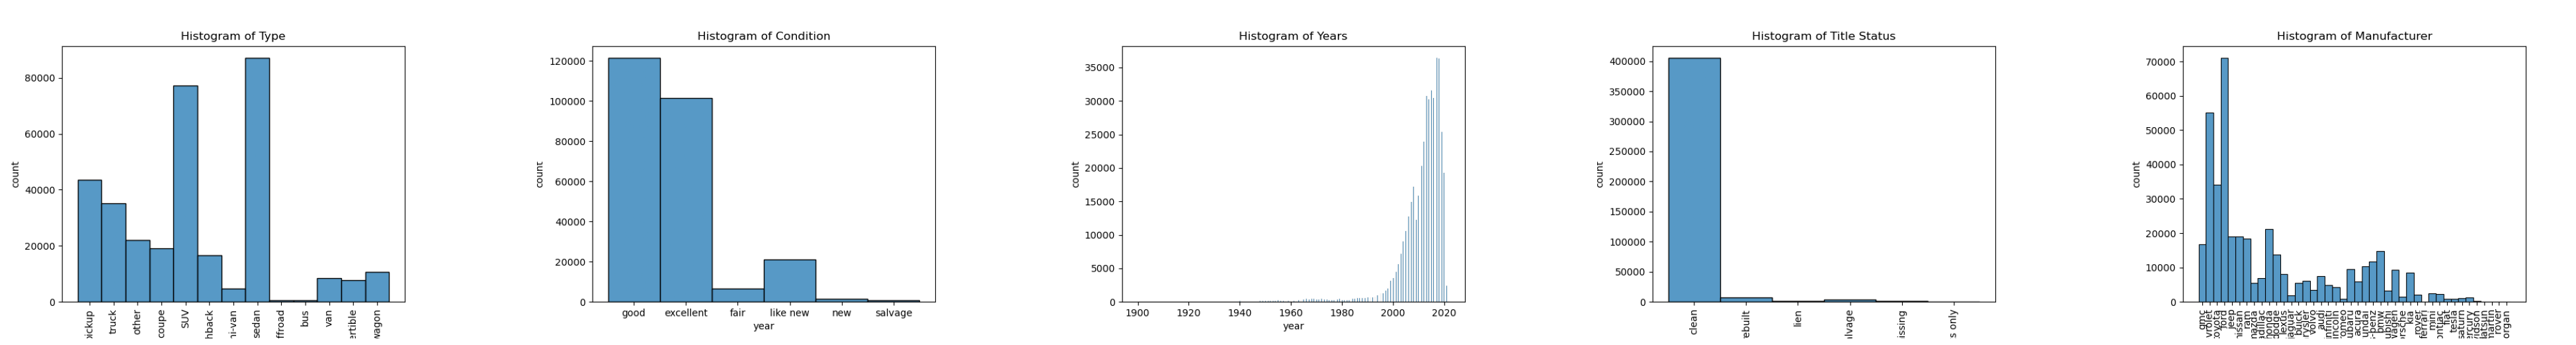

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

image_files = glob.glob('Images/*.png')
images = [mpimg.imread(img) for img in image_files]
plt.figure(figsize=(50, 10))
# Display all images
for i, img in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

Verify Data Quality
Several columns exhibit substantial missing data, notably: condition, cylinders, VIN, drive, size (with approximately 71% missing), and paint_color. Due to the high percentage of missingness and potential noise, these columns may provide limited predictive value and will be considered for removal or imputation depending on subsequent modeling steps.

Additional data quality checks confirmed the absence of duplicates and basic consistency across key variables.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Select Data
The following attributes were selected for analysis based on data availability, expected variance, and relevance to predicting used car prices:

price
year
condition
region
manufacturer
cylinders
odometer
drive
type
paint_color
state
decade (engineered from year)

The following attributes were excluded:

id: Identifier column; provides no predictive value
title_status, transmission, VIN, fuel: Low variance and unlikely to contribute meaningful predictive power
size: Dropped due to ~71% missing values
model: High-cardinality string variable with too much variation to model meaningfully


### Clean Data
The following data cleaning steps were performed:

price: Outliers were identified using the IQR method. There were no values below the lower whisker, but 8,008 values above the upper whisker were removed. Additionally, all entries with price values below $1,000 (including $0) were dropped, as they are likely errors.

year: Records prior to 1990 were removed to focus on vehicles more relevant to today’s used car market.

condition: Missing values were imputed with "fair".

cylinders: The string "X cylinders" format was converted to numeric values. Missing and "other" entries were replaced by the average number of cylinders.

odometer: Missing values were filled using the mean odometer reading for each vehicle year to maintain consistency across similar years.

manufacturer, drive, type, paint_color: Missing values were filled with "unknown" to retain the rows while acknowledging uncertainty.


### Construct Data
odometer_zscore: A z-score standardized version of the odometer column, computed by subtracting the mean and dividing by the standard deviation. This helps reduce scale impact in models sensitive to feature magnitude.

### Integrate Data
No additional datasets were merged with this dataset. All analysis was performed on a single, cleaned dataset from Kaggle.

### Format Data
After cleaning and transformation, the dataset was shuffled randomly using .sample(frac=1) and the index was reset to eliminate any ordering bias.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Select Modeling Technique

To determine the best combination of variables, 4 different modeling techniquest will be used:

# Model 1
Using Pipeline, utilize the sklearn LinearRegression, PoloynomailFeatures and OneHotEnconder functions.

LinearRegression: fits a  line through a data to predict a numeric outcome.

PolynomialFeatures: Creates new features by taking powers of existing numeric features.

OneHotEncoder: Converts text (categorical) variables into binary (0/1) columns.

Purpose: Establish a baseline model using full features with polynomial expansion.

# Model 2
Using PipeLine, OneHotEndocer, PolynomialFeatures and SequentialFeatureSelector.

SequentialFeatureSelector:  selects a subset of features that leads to the best model performance.

Purpose: Improve performance by reducing feature dimensionality.

# Model 3
Using PipeLine, OneHotEndocer, PolynomialFeatures, Lasso and StandardScaler

Lasso: Like LinearRegression, adds a penalty value (alpha) on the sum of the absolute values of the coefficients.

StandardScaler: Standardizes features by removing the mean and scaling to unit variance.

Purpose: Prevent overfitting and remove irrelevant features.

# Model 4
Using PipeLIne, OneHotEncoder, PolynomialFeatures and Ridge.

Ridge: Like LinearRegression, adds a penalty value (alpha) on the squared values of the coefficients.

Purpose: Improve generalization when features are correlated or the model is complex.

### Generate Test Design

To train and evaluate the models, the dataset will be split using train_test_split from scikit-learn, allocating:

70% of the data for training the model

30% of the data for testing (validation) to assess performance on unseen data

The results of the model will be validated using the Mean Squared Error (MSE).

MSE: Measures the different between the documented outcome and the predicted outcome for the test data set and squares the results.

Build Model

## Model 1

Features: year, cylinders, odometer, odometer_standardized, condition (OneHotEncoding)
Hyperparameters: PolynomialFeatures degree = 2, include_bias=False
Coef: -2.32147039e+05 -3.17694517e+05 -3.65889700e-01  1.10478917e+05
  1.47417046e+03 -2.32835414e+05 -2.42020190e+04 -5.54321504e+03
  1.23717058e+05  1.37389420e+05  5.68025876e+01  1.85796611e+02
  1.76702676e-04 -5.56606119e+01  3.71082521e+03  3.94579564e+03
  3.73873782e+03  3.71875205e+03  3.59149025e+03  3.57437385e+03
 -4.76308342e+01  5.27474739e-03 -1.33505778e+03 -5.22294740e+04
 -5.28521022e+04 -5.30286621e+04 -5.24839049e+04 -5.32080078e+04
 -5.41171001e+04  1.53262590e-07 -3.76662018e-02 -9.86742424e-02
 -9.39042846e-02 -1.02297129e-01 -1.05841014e-01 -9.90407610e-02
 -4.40269063e-02  2.30402452e+03  1.98213959e+04  1.88915624e+04
  1.96285494e+04  2.05932966e+04  1.87388831e+04  1.28052294e+04
  1.47416882e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.32835414e+05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.42020188e+04
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.54321479e+03
  0.00000000e+00  0.00000000e+00  1.23717058e+05  0.00000000e+00
  1.37389420e+05
 Int: 229665814.69954872


MSE Train: 65,296,199.92
MSE Test: 65,280,454.96

Parameters: year, cylinders, odometer, odometer_standardized, type (OneHotEncoding)
Hyperparameters: PolynomialFeatures degree = 2, include_bias=False
Coef: -2.11805159e+05 -1.96979920e+05 -2.64228303e-01  7.73716534e+04
 -2.44310895e+05  2.18970960e+05  7.23929159e+04 -4.70529806e+04
  5.43502038e+01  1.25220482e+02  1.25150324e-04 -3.96163559e+01
 -6.10168174e+03 -6.56424077e+03 -6.41415742e+03 -6.30156770e+03
 -2.84138379e+02  3.25601848e-03 -9.64056544e+02 -4.90108469e+04
 -4.99191891e+04 -5.00751331e+04 -4.86227046e+04  1.75590492e-07
 -4.59793589e-02 -9.69745770e-02 -8.02630361e-02 -9.77795843e-02
 -8.74127047e-02  3.00087363e+03  1.96085146e+04  1.82885951e+04
  2.05395392e+04  1.89350039e+04 -2.44310895e+05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.18970960e+05  0.00000000e+00
  0.00000000e+00  7.23929160e+04  0.00000000e+00 -4.70529806e+04


MSE Train: 56,090,371.02
MSE Test: 56,158,645.51

## Model 2

Features: 3 combinations using OneHotEncoder, only drive, only condition, then all. Final combination was all.
Selected Features: year, cylinders, odometer, odometer_standardized, condition_fair, condition_good, type_SUV, type_hatchback, type_other, type_pickup, type_sedan, 'ype_truck, 'type_wagon', 'drive_4wd', drive_fwd, drive_unknown
Hyperparameter
estimator: LinearRegression
n_features_to_select: varyed from 3 to 258. Final value was 12
direction: forward
scoring	Metric: neg_mean_squared_error
cv: train_idx, test_idx

MSE Test: 59043551.00

## Model 3

Features: year, cylinders, odometer, odometer_standardized
Hyperparameters
PolynomialFeature Degree = 3
alpha = 1
Coef = -3.09241485e+03 -7.40026064e+01  3.66579924e+03  1.13226514e-09
  5.05129614e+03  2.54909966e+03 -2.36039526e+02 -0.00000000e+00
  1.31179165e+03 -1.87137202e+03 -0.00000000e+00  4.13082626e+03
  0.00000000e+00  0.00000000e+00  4.50262988e+03  1.66225399e+03
 -3.34086767e+03 -0.00000000e+00  1.36161971e+03 -2.10570714e+03
 -0.00000000e+00  3.89962368e+03  0.00000000e+00  0.00000000e+00
 -1.71563651e+03 -1.59877974e+03 -4.03135912e+02  5.80651212e+03
  6.08889186e+01  5.79303181e+01 -9.12618490e+03 -7.82626561e+01
 -7.85489478e+01 -7.88180214e+01
Intercept = 18503.898289484903


MSE Train: 74718441.53
MSE Test: 74554792.08

## Model 4
Features: year, cylinders, odometer, odomoeter_standardized, drive (OneHotEncoder)
PolynomialFeatres degree = 2
alpha = 10
Ridge Coefs = -1.23901924e+05 -4.57032743e+04 -2.77981427e+01 -2.41765298e+03
 -1.65884995e+04  1.36789861e+04  3.76807267e+03 -8.58559781e+02
  3.87616263e+01  3.12332147e+01 -2.84055696e-04  3.11105545e+00
 -3.09591928e+04 -3.09900072e+04 -3.09776325e+04 -3.09772785e+04
 -1.87350689e+02 -1.16638863e-02  1.30345727e+03 -1.05938780e+04
 -1.24700599e+04 -1.17773517e+04 -1.08619761e+04  1.90092802e-07
 -4.38675612e-02  2.83294870e+01  2.83707683e+01  2.83443820e+01
  2.83513572e+01  2.48527295e+03  1.37498223e+03 -3.36016902e+03
  3.37563529e+02 -7.70029833e+02 -1.65884995e+04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.36789859e+04  0.00000000e+00
  0.00000000e+00  3.76807270e+03  0.00000000e+00 -8.58559756e+02
Intercept = 154697567.28237697

MSE Train: 56325034.59
MSE Test: 56332212.29

### Assess Model

To evaluate model performance, each regression model was assessed using Mean Squared Error (MSE) on both the training and testing datasets. Lower MSE values indicate better predictive accuracy and generalization.

## Insights:

Model 4 (Ridge Regression) achieved the lowest test MSE overall, which means applying L2 regularization helped reduce overfitting and maintained model complexity using polynomial features.

Model 2 (Sequential Feature Selection) was similar in performance, meaning that carefully selecting relevant features was similar to regularized models.

Model 1, (LinearRegression and full polynomial expansion) had average performance. Using the type feature instead of condition performed better. Other categorical features took too long to run using OneHotEncoding and were not possible to use.

Model 3 (Lasso Regression) was not as good as the others, possibly due to incorrect alphas being choosen.

## Conclusion

Model 4 is the preferred model:

    Uses relevant numeric and categorical variables (with OneHotEncoding),

    Applies PolynomialFeatures for non-linear patterns,

    Regularizes using Ridge to avoid overfitting.


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Evaluate Results

Our business objective was to identify which features most accurately predict the price of a used car. After developing and evaluating four models, we found that the best-performing approach was a Ridge Regression model (L2 regularization) with Polynomial Features and One-Hot Encoding.

The most predictive features identified were: year, cylinders, odometer, odometer_standardized, and drive (encoded categorically). This model achieved the lowest test MSE of approximately 56 million, indicating strong predictive performance on unseen data.

We have successfully achieved our objective by:

    Building multiple regression models,

    Comparing performance using mean squared error, and

    Selecting the optimal feature set and model configuration to accurately predict used car prices.

### Review Process

1. Model Validity

    The chosen Ridge Regression model demonstrated strong generalization with a low test Mean Squared Error (≈ 56 million), confirming that the model performs well on unseen data.

    The use of polynomial features and OneHotEncoding was validated as appropriate based on improvements in model accuracy.

    No overfitting was observed, as training and test MSEs were closely aligned.

2. Business Alignment

    The model answers the core business question: Which features help accurately predict the price of a used car?

    The most important and predictive features identified—year, cylinders, odometer, odometer_standardized, and drive—are all understandable and actionable by stakeholders such as car resellers or pricing analysts.

3. Reproducibility and Transparency

    All preprocessing steps (e.g., imputation, encoding, scaling, and polynomial expansion) were implemented using scikit-learn Pipelines, ensuring reproducibility and consistent transformations across datasets.

    Model selection and evaluation used standard metrics (MSE) and structured workflows (cross-validation or test/train splits), making results easy to replicate or extend in future analyses.

### Determine Next Steps

The following steps are recommended to maximize business value and support long-term deployment:
1. Operational Testing

    Conduct real-world testing by applying the model to recent or incoming used car listings.

    Compare the model's predicted prices to actual sale prices to further validate its accuracy in production conditions.

2. Model Deployment

    Possibly package the trained model and preprocessing pipeline for integration into a web application, internal pricing tool, or batch prediction process.

3. Monitoring & Maintenance

    Develop performance monitoring to track  accuracy over time.

    Re-train or update the model periodically using fresh data to maintain relevance as market conditions change.

4. Model Refinement

    Explore hyperparameter tuning to optimize model performance.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Plan Deployment

Deploy the model using a  scikit-learn pipeline to generate price predictions from user input. Ongoing monitoring, retraining, and documentation can ensure the model remains accurate, maintainable, and aligned with business needs.

### Plan Monitoring and Maintenance

A monitoring and maintenance plan will be implemented to regularly evaluate the model’s accuracy by comparing predicted prices to actual sales and checking for data drift. The model will be retrained periodically with updated data to ensure continued reliability and alignment with current market conditions.

### Review Project
Throughout the project, I found that combining polynomial features with regularization  improved model performance, while overly complex feature sets sometimes led to overfitting. One key learning was the importance of systematic feature selection and testing different encoding strategies to achieve accurate, interpretable results. When categorical features got too large, OneHotEncoding was unable to run so it's important to limit the size of your models.